# Detection of Malaria 🦟🦠

**INTRODUCTION**

Malaria is a life-threatening disease. It’s typically transmitted through the bite of an infected anopheles mosquito. Infected mosquitoes carry the plasmodium parasite. When this mosquito bites you, the parasite is released into your bloodstream. It is considered as an endemic in many parts of the world.

Malaria detection is performed by examining a drop of the patient’s blood, spread out as a “blood smear” (red blood cell) on a microscope slide. This blog focuses on improving malaria detection from such patches segmented from the microscopic images of blood smears by introducing a deep convolutional neural network. Compared to the traditional methods that use tedious hand engineering feature extraction, the proposed method uses deep learning in an end-to-end arrangement that performs both feature extraction and classification directly from the raw segmented patches of the red blood smears.

**Risk Factor:**

Malaria is commonly associated with poverty and has a major negative effect on economic development. In Africa, it is estimated to result in losses of US$12 billion a year due to increased healthcare costs, lost ability to work, and negative effects on tourism.

**Symptoms of Malaria**

A malaria infection is generally characterized by the following signs and symptoms:

*Fever

*Chills

*Headache

*Nausea and vomiting

*Muscle pain and fatigue

Other signs and symptoms may include:

*Sweating

*Chest or abdominal pain

*Cough

**How is Malaria diagnosed by pathologists?**

Typically Malaria is diagnosed by microscopic examination of blood cells under the supervision of a pathologist. Red blood cells are examined using a microscope using blood films. The pathologists tries to find evidence of Malaria using past domain knowledge. Typically, when a cell is infected with Malaria one can see distorted cell shapes which are also accompanied by certain blunt spots in the cell.

**PROBLEM STATEMENT**

For malaria as well as other microbial infections, manual inspection of thick and thin blood smears by trained microscopists remains the gold standard for parasite detection and stage determination because of its low reagent and instrument cost and high flexibility. Despite manual inspection being extremely low throughput and susceptible to human bias, automatic counting software remains largely unused because of the wide range of variations in brightfield microscopy images. However, a robust automatic counting and cell classification solution would provide enormous benefits due to faster and more accurate quantitative results without human variability; researchers and medical professionals could better characterize stage-specific drug targets and better quantify patient reactions to drugs.

**Information about the dataset.**

The dataset is downloaded from Kaggle from this link — https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria. The dataset was originally taken from the NIH website and uploaded to a Kaggle repository. The dataset contains 27558 cell images. Out of these 27558 images, we have 13779 cell images which are infected by Malaria and an other 13779 images which are uninfected.

# **Creating CNN using scratch and Transfer Learning**

# Loading the data

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
#from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [1]:
#VGGG19 is used as transfer learning model VGG19 gives more accuracy than VGG16 and resenet50

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob('Dataset/train/*')

In [8]:
folders

['Dataset/train\\Parasite', 'Dataset/train\\Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
 # Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

C:\Users\ROGZEP~1\AppData\Local\Temp/ipykernel_12748/2987964121.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 12s 909ms/step - loss: 2.5079 - accuracy: 0.5721 - val_loss: 0.9615 - val_accuracy: 0.3955
Epoch 2/50
13/13 [==============================] - 9s 648ms/step - loss: 0.6901 - accuracy: 0.5673 - val_loss: 0.7901 - val_accuracy: 0.3881
Epoch 3/50
13/13 [==============================] - 9s 660ms/step - loss: 0.5817 - accuracy: 0.7043 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 4/50
13/13 [==============================] - 9s 646ms/step - loss: 0.5351 - accuracy: 0.7236 - val_loss: 0.7981 - val_accuracy: 0.3955
Epoch 5/50
13/13 [==============================] - 9s 652ms/step - loss: 0.4959 - accuracy: 0.7476 - val_loss: 0.7311 - val_accuracy: 0.6119
Epoch 6/50
13/13 [==============================] - 9s 656ms/step - loss: 0.4631 - accuracy: 0.7909 - val_loss: 0.6946 - val_accuracy: 0.5597
Epoch 7/50
13/13 [==============================] - 9s 665ms/step - loss: 0.3862 - accuracy: 0.8293 - val_loss: 0.8631 - val_accuracy: 0.5299
Epoch

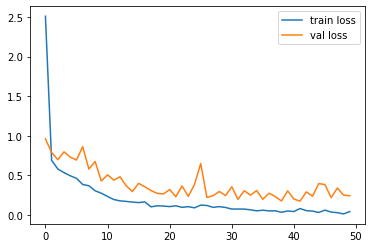

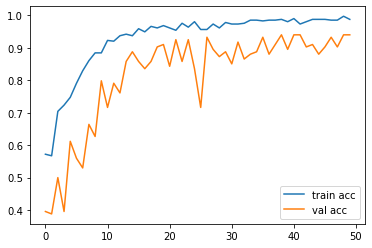

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [25]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 101ms/step


In [26]:
y_pred

array([[9.99925375e-01, 7.46539081e-05],
       [9.83449280e-01, 1.65507086e-02],
       [9.76888835e-01, 2.31111180e-02],
       [5.88543974e-02, 9.41145658e-01],
       [9.93234217e-01, 6.76572137e-03],
       [1.00000000e+00, 2.91301922e-13],
       [9.96541321e-01, 3.45867523e-03],
       [1.67398509e-02, 9.83260095e-01],
       [1.00000000e+00, 2.30265477e-11],
       [1.05507681e-02, 9.89449263e-01],
       [9.99999762e-01, 2.23617675e-07],
       [9.46278989e-01, 5.37210032e-02],
       [9.96864855e-01, 3.13515775e-03],
       [3.37317074e-03, 9.96626854e-01],
       [9.99839425e-01, 1.60595737e-04],
       [1.35799339e-02, 9.86420095e-01],
       [1.34953875e-02, 9.86504614e-01],
       [9.98336017e-01, 1.66405912e-03],
       [9.99940395e-01, 5.95887941e-05],
       [9.99990940e-01, 9.00209761e-06],
       [2.23732628e-02, 9.77626681e-01],
       [2.53704518e-01, 7.46295452e-01],
       [9.99586999e-01, 4.13032336e-04],
       [9.99984264e-01, 1.57580034e-05],
       [3.629417

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_vgg19.h5')

In [31]:
model

In [32]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

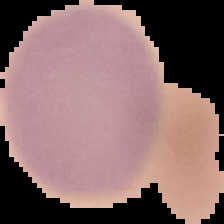

In [33]:
img

In [34]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [35]:
x.shape

(224, 224, 3)

In [36]:
x=x/255

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

1/1 [==============================] - 0s 102ms/step


array([[0., 1.]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 45ms/step


In [40]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


# **Conclusion**

*Transfer learning significantly increases the classification performance we have got validation accuracy of 94% for the model

*By using VGG16,Resenet50 and VGG19 we found VGG19 gives more accuracy

*Here VGG19 is used as the transfer learning technique

*The project is done with the purpose of finding out,whether the person is infected by Malaria disease or not.we create cnn from scratch and vgg19 ,we found that the person is Uninfected by Malaria disease.